✓ Libraries imported successfully

Upload Restaurant_Reviews.tsv file


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv
Dataset Loaded Successfully!

Processing text data, please wait...
✓ Text preprocessing completed!

✓ TF-IDF Vectorization Completed

✓ Train/Test Split Done

Training BernoulliNB...
Training MultinomialNB...

BernoulliNB Accuracy   : 0.755
MultinomialNB Accuracy : 0.765

Selected Best Model: MultinomialNB

FINAL ACCURACY: 0.765

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        96
           1       0.79      0.74      0.77       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.77       200



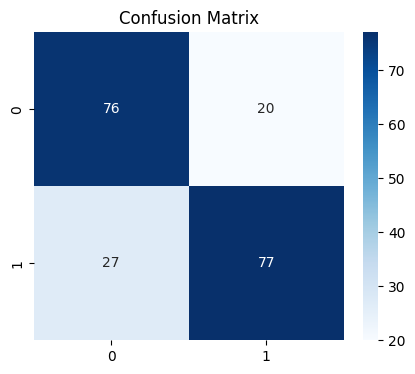


Test Review: Not tasty and the texture was just nasty
Prediction: Not Liked 👎

✓ Model & TF-IDF saved successfully!


In [1]:
# ============================================================
# GEN-AI NAIVE BAYES RESTAURANT REVIEW CLASSIFIER
# Reference: Restaurant Review Classifier Document (docx)
#            GEN_AI_Naive_.ipynb Structure & Workflow
# ============================================================

# -----------------------------
# 1. INSTALL & IMPORT LIBRARIES
# -----------------------------
!pip install nltk scikit-learn pandas numpy joblib

import pandas as pd
import numpy as np
import nltk
import re
import joblib
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

print("✓ Libraries imported successfully\n")


# -----------------------------
# 2. LOAD THE DATASET
# -----------------------------
from google.colab import files
print("Upload Restaurant_Reviews.tsv file")
uploaded = files.upload()

df = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t")
print("Dataset Loaded Successfully!")
df.head()


# -----------------------------
# 3. TEXT CLEANING & PREPROCESSING
# GEN-AI Style Preprocessing
# -----------------------------
ps = PorterStemmer()
corpus = []

print("\nProcessing text data, please wait...")

for review in df["Review"]:
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review
              if word not in stopwords.words("english")]

    corpus.append(" ".join(review))

print("✓ Text preprocessing completed!\n")


# -----------------------------
# 4. TF-IDF ENCODING
# GEN-AI Style: Bigram + High Feature Count
# -----------------------------
tfidf = TfidfVectorizer(
    max_features=2500,
    ngram_range=(1,2),
    sublinear_tf=True
)

X = tfidf.fit_transform(corpus).toarray()
y = df["Liked"].values

print("✓ TF-IDF Vectorization Completed\n")


# -----------------------------
# 5. TRAIN-TEST SPLIT (80:20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print("✓ Train/Test Split Done\n")


# -----------------------------
# 6. TRAIN BOTH NAIVE BAYES MODELS
# GEN-AI Notebook Style
# -----------------------------
print("Training BernoulliNB...")
model_b = BernoulliNB()
model_b.fit(X_train, y_train)
pred_b = model_b.predict(X_test)
acc_b = accuracy_score(y_test, pred_b)

print("Training MultinomialNB...")
model_m = MultinomialNB()
model_m.fit(X_train, y_train)
pred_m = model_m.predict(X_test)
acc_m = accuracy_score(y_test, pred_m)

print(f"\nBernoulliNB Accuracy   : {acc_b}")
print(f"MultinomialNB Accuracy : {acc_m}")

best_model = model_m if acc_m > acc_b else model_b
print("\nSelected Best Model:", best_model.__class__.__name__)


# -----------------------------
# 7. EVALUATION
# -----------------------------
y_pred = best_model.predict(X_test)

print("\nFINAL ACCURACY:", accuracy_score(y_test, y_pred))
print("\nCLASSIFICATION REPORT:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


# -----------------------------
# 8. PREDICTION FUNCTION (GEN-AI VERSION)
# -----------------------------
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    text = [ps.stem(w) for w in text if w not in stopwords.words('english')]
    return " ".join(text)

def predict_review(text):
    cleaned = preprocess_text(text)
    vec = tfidf.transform([cleaned]).toarray()
    pred = best_model.predict(vec)[0]
    return "Liked 👍" if pred == 1 else "Not Liked 👎"

# test example
example = "Not tasty and the texture was just nasty"
print("\nTest Review:", example)
print("Prediction:", predict_review(example))


# -----------------------------
# 9. SAVE MODEL FOR WEB APP
# -----------------------------
joblib.dump(best_model, "review_model.pkl")
joblib.dump(tfidf, "tfidf.pkl")

print("\n✓ Model & TF-IDF saved successfully!")
